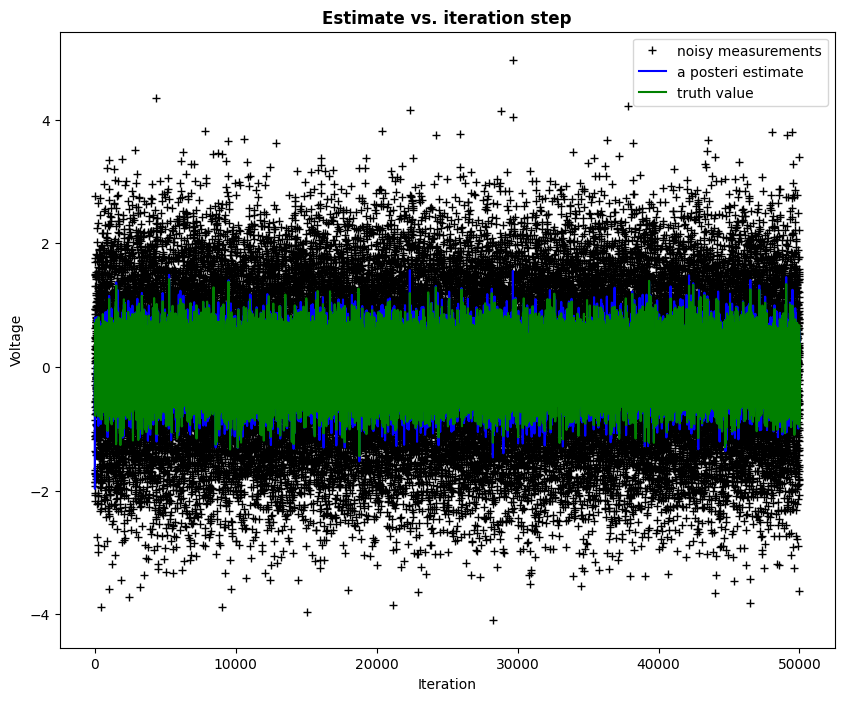

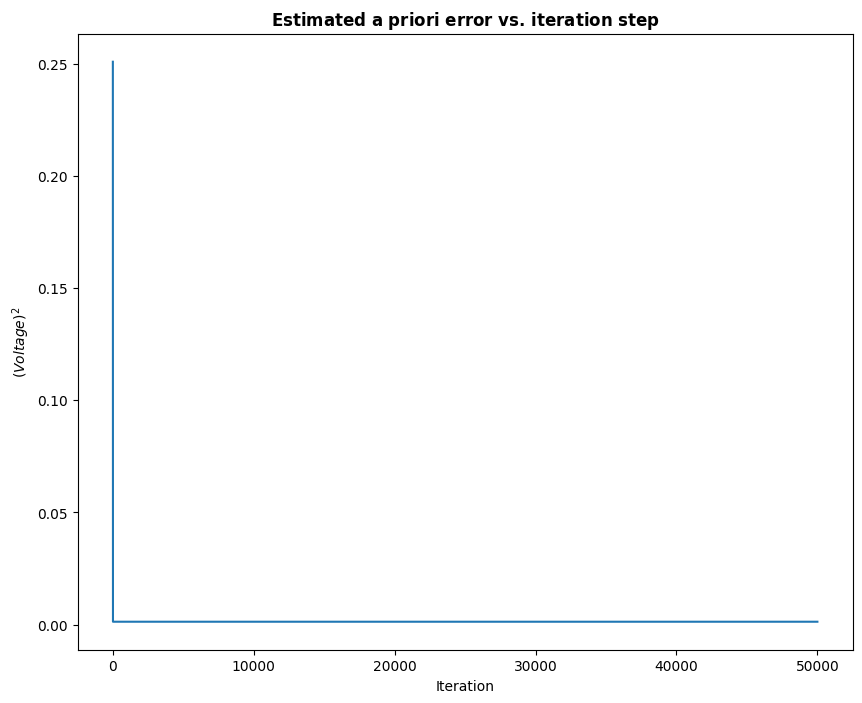

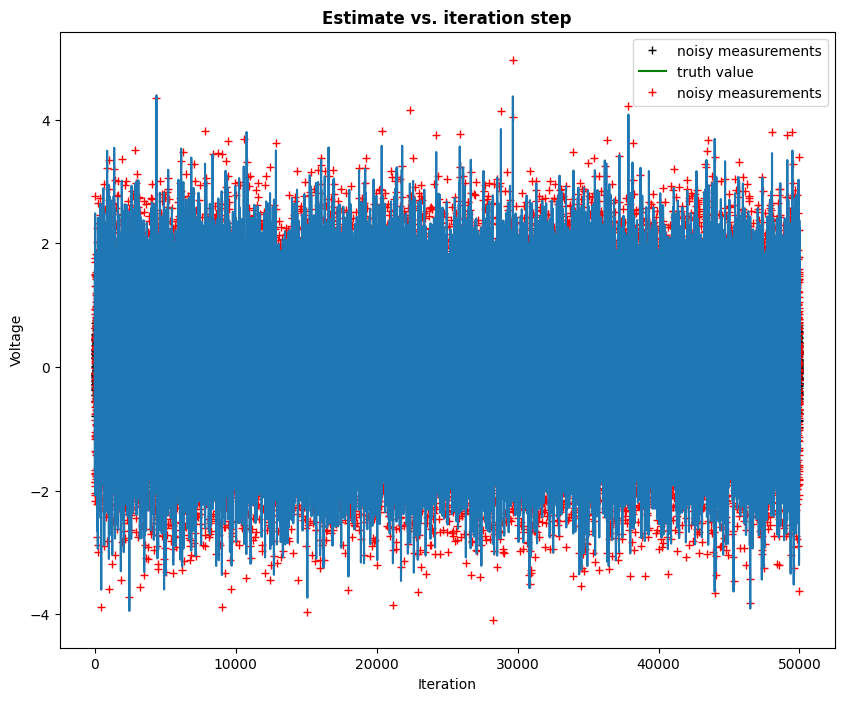

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# Initial parameters
n_iter = 50000  # Number of samples
sz = (n_iter,)  # size of array
x_nn = np.zeros((n_iter, 3))  # truth value (initialize array)
z_nn = np.zeros(sz)  # observations (initialize array)

# System parameters
a = 0.5
b = 0.3
u = np.random.normal(0, 1, size=sz)  # Random input
x = np.zeros(sz)  # Truth value (initialize array)

# Generate truth values using the system ax + bu + noise
for k in range(1, n_iter):
    x[k] = a * x[k-1] + b * u[k-1]
test = np.random.normal(0, 1, size=sz) 
z = x + test  # Observations (add noise to the truth values)

Q = 1e-3  # Process variance

# Allocate space for arrays
xhat = np.zeros(sz)       # A posteri estimate of x
P = np.zeros(sz)          # A posteri error estimate
xhatminus = np.zeros(sz)  # A priori estimate of x
Pminus = np.zeros(sz)     # A priori error estimate
K = np.zeros(sz)          # Gain or blending factor

R = 0.1**2  # Estimate of measurement variance, change to see effect

# Initial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1, n_iter):
    # Time update
    xhatminus[k] = a * xhat[k-1] + b * u[k-1]
    Pminus[k] = a**2 * P[k-1] + Q

    # Measurement update
    K[k] = Pminus[k] / (Pminus[k] + R)
    xhat[k] = xhatminus[k] + K[k] * (z[k] - xhatminus[k])
    P[k] = (1 - K[k]) * Pminus[k]
    x_nn[k, 0] = xhat[k-1]
    x_nn[k, 1] = u[k-1]
    x_nn[k, 2] = z[k]
y_nn = x

# Plot the results
plt.figure()
plt.plot(z, 'k+', label='noisy measurements')
plt.plot(xhat, 'b-', label='a posteri estimate')
plt.plot(x, color='g', label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1, n_iter)  # Pminus not valid at step 0
plt.plot(valid_iter, Pminus[valid_iter], label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.show()

# plot y
plt.figure()
plt.plot(y_nn, 'k+', label='noisy measurements')
# plt.plot(x_nn[0, :], 'b-', label='a posteri estimate')
plt.plot(x, color='g', label='truth value')
plt.plot(z, 'r+', label='noisy measurements')
# plt.plot(x_nn[1, :], color='g', label='truth value')
plt.plot(test)
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')
plt.show()


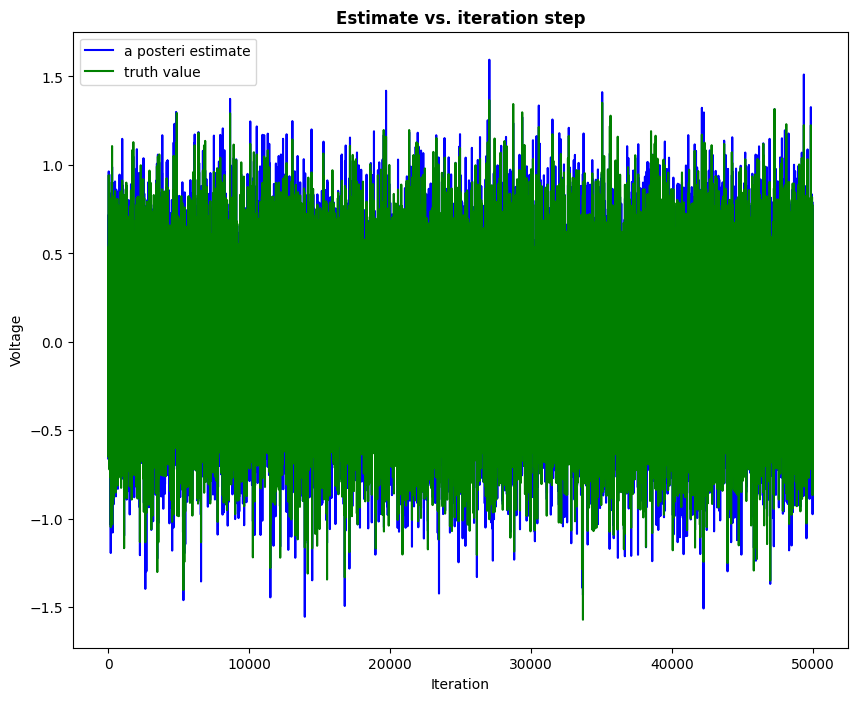

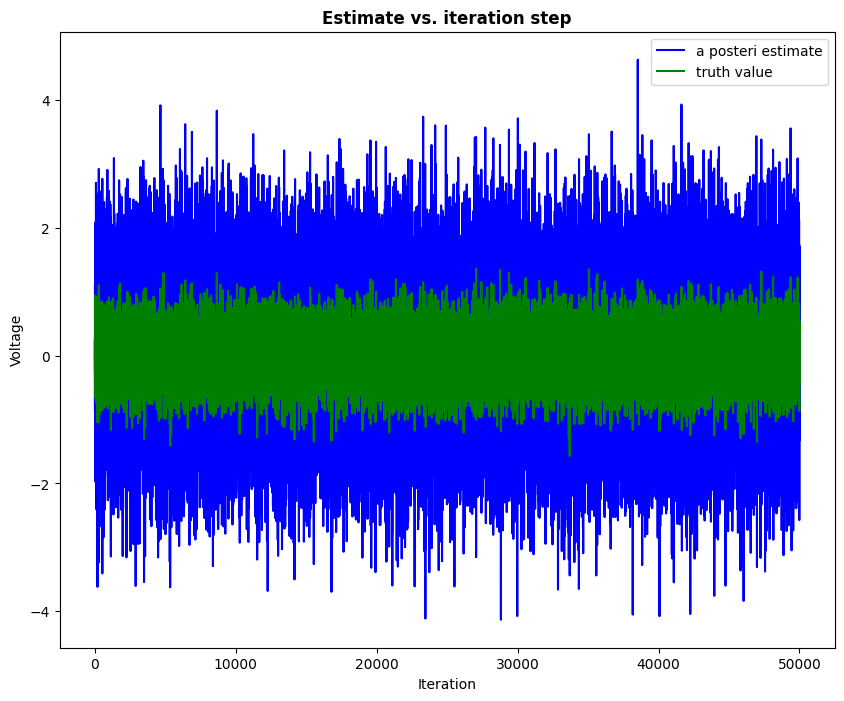

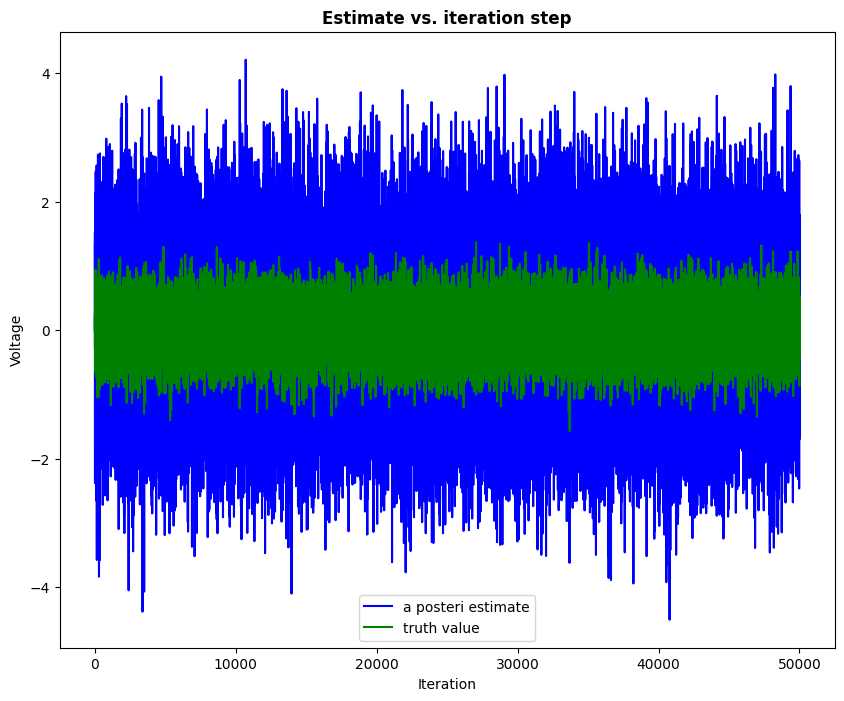

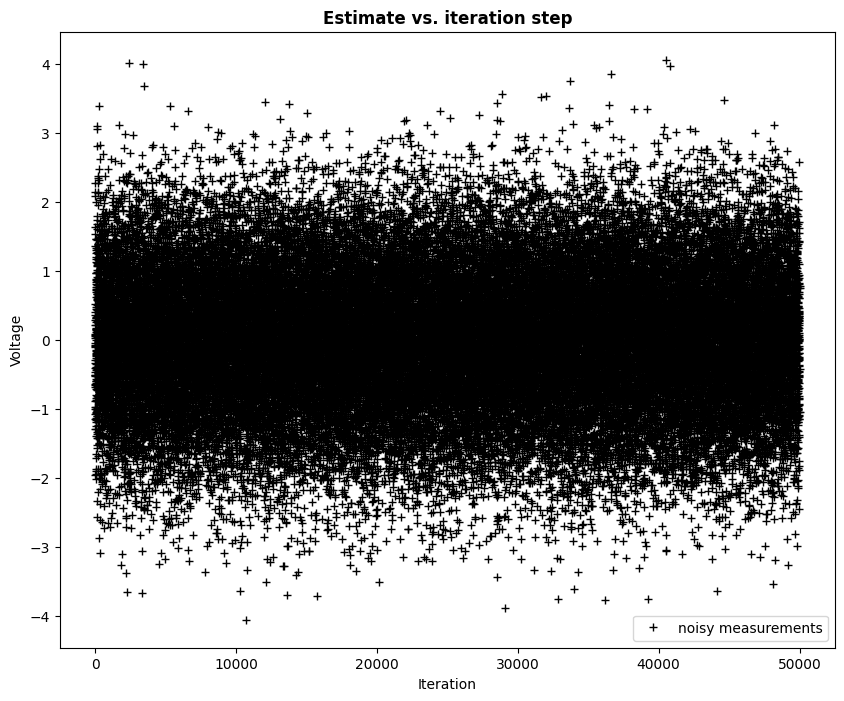

In [5]:
# plot x nn and y nn in separeate figures
plt.figure()
plt.plot(x_nn[:, 0], 'b-', label='a posteri estimate')
plt.plot(x, color='g', label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')
plt.show()

plt.figure()
plt.plot(x_nn[:, 1], 'b-', label='a posteri estimate')
plt.plot(x, color='g', label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')
plt.show()

plt.figure()
plt.plot(x_nn[:, 2], 'b-', label='a posteri estimate')
plt.plot(x, color='g', label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')
plt.show()

plt.figure()
plt.plot(y_nn, 'k+', label='noisy measurements')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')
plt.show()



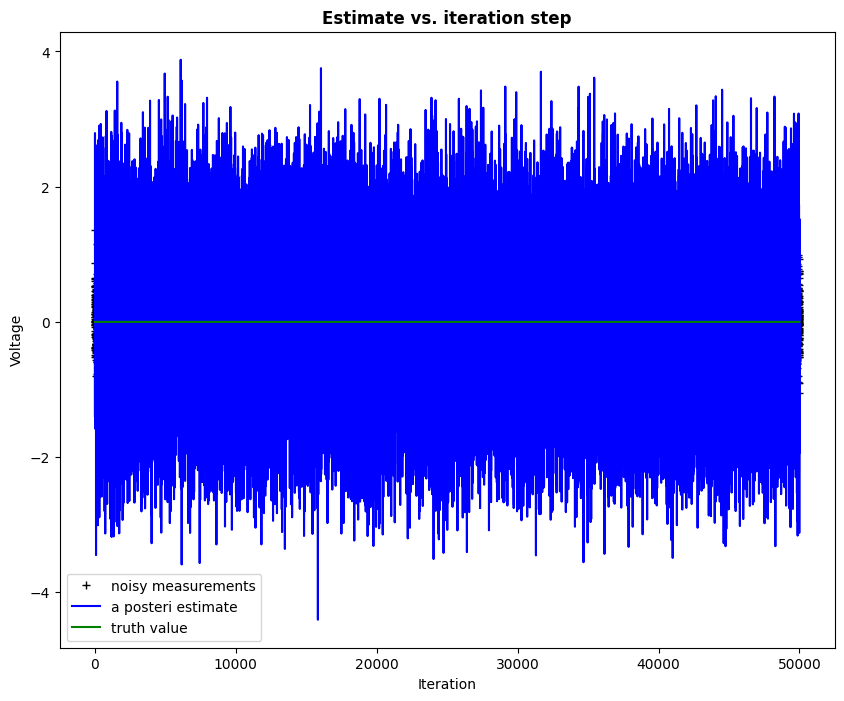

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming x_nn and y_nn are your input and output data
# plot x nn and z nn
plt.figure()
plt.plot(x_nn[:, 0], 'k+', label='noisy measurements')
plt.plot(x_nn[:, 1], 'b-', label='a posteri estimate')
plt.plot(z_nn, color='g', label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')
plt.show()


In [13]:
# make LSTM neuarl network
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

model = Sequential()
model.add(LSTM(64, activation='sigmoid', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# reshape x_nn and y_nn
x_nn = x_nn.reshape((x_nn.shape[0], x_nn.shape[1], 1))
y_nn = y_nn.reshape((y_nn.shape[0], 1))

# fit model
model.fit(x_nn, y_nn, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 0.0166
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0040
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0039
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0039
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0039
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0039
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0038
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0038
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0038
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0038


In [15]:
x_sample = x_nn[0]
print(x_nn[0].reshape(3, -1))
# Make a prediction
prediction = model.predict(x_sample)


[[0.]
 [0.]
 [0.]]
1/1 [==============================] - 0s 246ms/step


In [1]:
# load model
from tensorflow.keras.models import load_model
# model = load_model('model.h5')

2024-01-03 11:30:26.146085: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 21ms/step
  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle:

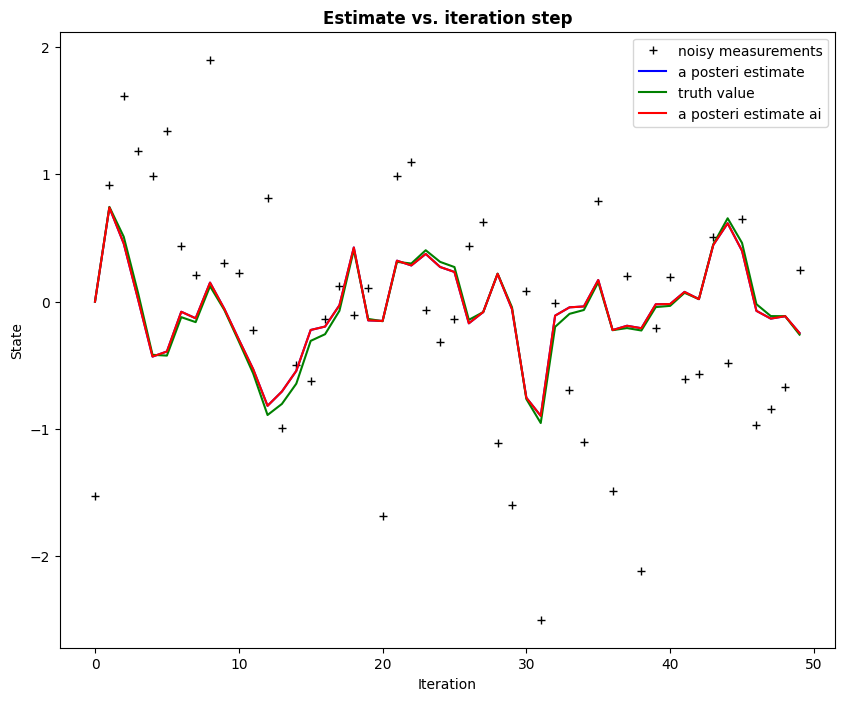

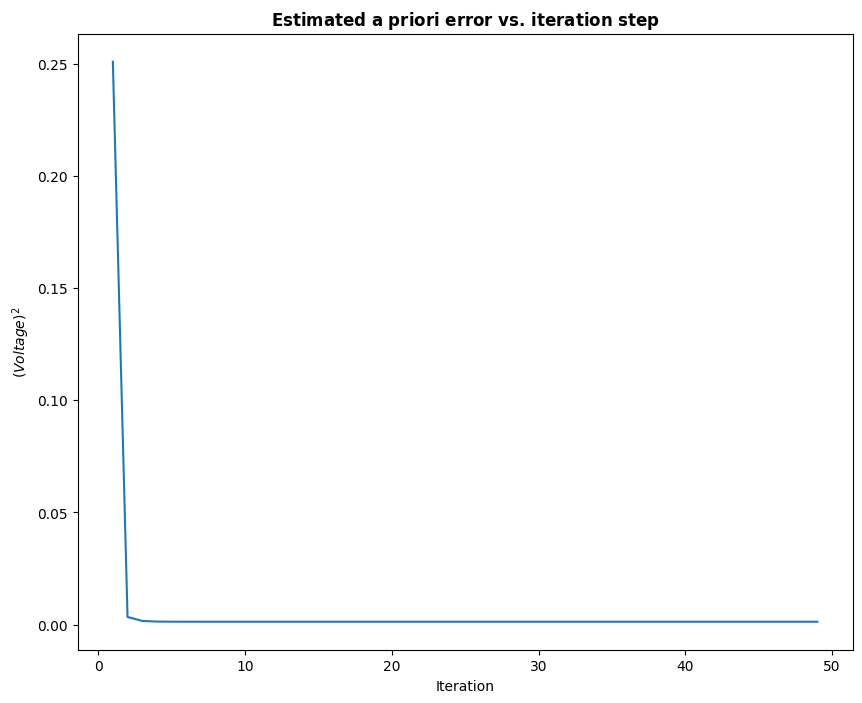

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# Initial parameters
n_iter = 50
sz = (n_iter,)  # size of array
x_nn = np.zeros((n_iter, 3))  # truth value (initialize array)
z_nn = np.zeros(sz)  # observations (initialize array)

# System parameters
a = 0.5
b = 0.3
u = np.random.normal(0, 1, size=sz)  # Random input
x = np.zeros(sz)  # Truth value (initialize array)

# Generate truth values using the system ax + bu + noise
for k in range(1, n_iter):
    x[k] = a * x[k-1] + b * u[k-1]
test = np.random.normal(0, 1, size=sz) 
z = x + test  # Observations (add noise to the truth values)

Q = 1e-3  # Process variance

# Allocate space for arrays
xhat = np.zeros(sz)       # A posteri estimate of x
xhat_ai = np.zeros(sz)       # A posteri estimate of x ai
P = np.zeros(sz)          # A posteri error estimate
xhatminus = np.zeros(sz)  # A priori estimate of x
Pminus = np.zeros(sz)     # A priori error estimate
K = np.zeros(sz)          # Gain or blending factor

R = 0.1**2  # Estimate of measurement variance, change to see effect

# Initial guesses
xhat[0] = 0.0
P[0] = 1.0
# load model

for k in range(1, n_iter):
    # Time update
    xhatminus[k] = a * xhat[k-1] + b * u[k-1]
    Pminus[k] = a**2 * P[k-1] + Q

    # Measurement update
    K[k] = Pminus[k] / (Pminus[k] + R)
    xhat[k] = xhatminus[k] + K[k] * (z[k] - xhatminus[k])
    P[k] = (1 - K[k]) * Pminus[k]

    x_nn[k, 0] = xhat[k-1]
    x_nn[k, 1] = u[k-1]
    x_nn[k, 2] = z[k]


    # Predict error 
    x_sample = np.array(x_nn[k]).reshape(-1, 3)

    # Make a prediction
    prediction = model.predict(x_sample)
    y_nn = prediction[0][0]
    xhat_ai[k] = y_nn
    xhat[k] = y_nn


# Plot the results
plt.figure()
plt.plot(z, 'k+', label='noisy measurements')
plt.plot(xhat, 'b-', label='a posteri estimate')
plt.plot(x, color='g', label='truth value')
plt.plot(xhat_ai, 'r-', label='a posteri estimate ai')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('State')

plt.figure()
valid_iter = range(1, n_iter)  # Pminus not valid at step 0
plt.plot(valid_iter, Pminus[valid_iter], label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca())
plt.show()

In [ ]:
# save model and architecture to single file
model.save("model.h5")